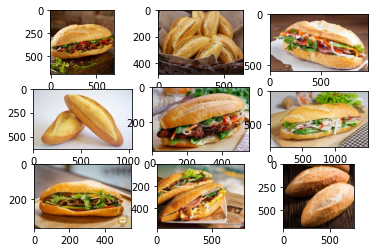

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Food/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'banhmi'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Food/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhmi'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('pho'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhbao'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhxeo'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('nemnuong'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thitkhotau'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('comtam'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('chalua'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhchuoi'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhtet'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(69, 200, 200, 3) (69,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 3s 190ms/step - loss: 914.9926 - accuracy: 0.1014
Epoch 2/20
3/3 [==============================] - 0s 63ms/step - loss: 468.5715 - accuracy: 0.1449
Epoch 3/20
3/3 [==============================] - 0s 62ms/step - loss: 117.9882 - accuracy: 0.2609
Epoch 4/20
3/3 [==============================] - 0s 61ms/step - loss: 23.2621 - accuracy: 0.5072
Epoch 5/20
3/3 [==============================] - 0s 60ms/step - loss: 6.4817 - accuracy: 0.6087
Epoch 6/20
3/3 [==============================] - 0s 59ms/step - loss: 0.2769 - accuracy: 0.9275
Epoch 7/20
3/3 [==============================] - 0s 60ms/step - loss: 0.1344 - accuracy: 0.9565
Epoch 8/20
3/3 [==============================] - 0s 60ms/step - loss: 0.0791 - accuracy: 0.9710
Epoch 9/20
3/3 [==============================] - 0s 61ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 10/20
3/3 [==============================] - 0s 61ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 11/20
3/3 [====

In [ ]:
model.evaluate(photos,labels)

3/3 [==============================] - 0s 25ms/step - loss: 5.1830e-09 - accuracy: 1.0000


[5.183012241616325e-09, 1.0]

In [ ]:
model.save('10Foods_Final.h5')

In [ ]:
from keras.models import load_model
models=load_model('10Foods_Final.h5')

In [ ]:
classes = ["Banhmi","Pho","Banhbao","Banhxeo","Nemnuong","Thitkho","ComTam","ChaLuA","ThitKhoTau","TrungVitLon"]

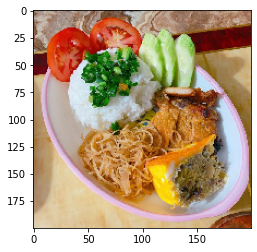

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/Food/comtam2.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.108073   0.11737864 0.1050606  0.11479495 0.11103427 0.08874024
  0.13052206 0.09612401 0.06802084 0.06025141]]


'ComTam'